In [56]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

### Task 1 - Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока)

In [22]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [24]:
def StandartScaler(x):
    res = (x - x.mean())/x.std()
    return res

In [51]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
    return W

In [25]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [40]:
X_std = X.copy().astype(np.float)
for i in range(1,4):
     X_std[i] = StandartScaler(X[i])


In [43]:
lambda_range = np.linspace(1e-8,10, 10)
lambda_range

array([1.00000000e-08, 1.11111112e+00, 2.22222223e+00, 3.33333334e+00,
       4.44444445e+00, 5.55555556e+00, 6.66666667e+00, 7.77777778e+00,
       8.88888889e+00, 1.00000000e+01])

In [54]:
w_sum = np.array(list(map(lambda l: eval_model_reg2(X_std, y, iterations=5000, alpha=1e-4, lambda_=l),lambda_range)))
w_sum


array([[36.46854438,  3.18480086,  3.47644924,  4.37923576],
       [23.95833226,  2.62166794,  2.6140778 ,  2.94189314],
       [17.12414075,  2.1513978 ,  2.07353741,  2.20211331],
       [13.07914772,  1.79451664,  1.71111113,  1.76818936],
       [10.49958394,  1.5277222 ,  1.45406395,  1.48390066],
       [ 8.74423641,  1.32571399,  1.26326707,  1.28169397],
       [ 7.48370306,  1.16936394,  1.1163865 ,  1.12937482],
       [ 6.53831639,  1.04548584,  0.99995558,  1.00994865],
       [ 5.80422771,  0.94517831,  0.90544626,  0.91356121],
       [ 5.21810391,  0.86239041,  0.82722199,  0.83403902]])

Text(0.5, 1.0, 'Dependence of weights on lambda')

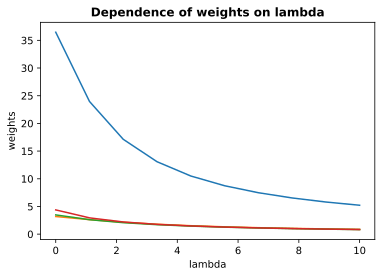

In [67]:
plt.plot(lambda_range, w_sum)
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Dependence of weights on lambda', fontweight='bold')

### Task 2 - Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

можно но не имеет смысла

### Task 3 - Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации

In [69]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1 / n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [70]:
eval_model_reg1(X_std,y,iterations=3000)

# итерация: 300, MSE: 2975.5529766570194, веса: [3.81082512 0.37171479 1.13004603 2.00190805]
# итерация: 600, MSE: 2633.3275436228623, веса: [6.93191857 0.80665466 1.53669558 2.40630157]
# итерация: 900, MSE: 2332.7379607148387, веса: [9.87123604 1.17802246 1.87923754 2.7476267 ]
# итерация: 1200, MSE: 2068.2455454085166, веса: [12.63936438  1.49552985  2.16749617  3.03555174]
# итерация: 1500, MSE: 1835.1727118008598, веса: [15.24627383  1.76740173  2.40979156  3.27826463]
# итерация: 1800, MSE: 1629.5392161846244, веса: [17.70135395  2.00060392  2.61316991  3.48269957]
# итерация: 2100, MSE: 1447.9356896888676, веса: [20.01344747  2.20103589  2.7835986   3.65472899]
# итерация: 2400, MSE: 1287.4249342009296, веса: [22.19088208  2.37369403  2.92613131  3.79932613]
# итерация: 2700, MSE: 1145.464035471392, веса: [24.24150046  2.52280994  3.04504796  3.9207027 ]
# итерация: 3000, MSE: 1019.8422091472063, веса: [26.17268854  2.65196748  3.14397314  4.02242544]


array([26.17268854,  2.65196748,  3.14397314,  4.02242544])